# Practical 2: Data Wrangling and Plots

As always, begin by saving a copy of the practical to your Google Drive. To do this, go to `File --> Save a copy in drive`, which saves to your University GSuite account (assuming you are logged into your University Account on Google).

The goal of this practical is to learn how to import and clean up a simple dataset in Python, and start to get to grips with the fundamentals of plotting.

**There is quite a lot in this practical...** don't panic. You'll see this material several times through the term, as you progress towards larger and more complex datasets, and more interesting plots.
It might be useful to think of this practical as more of a resource to refer to later, rather than something you need to understand every part of right now.

## Working with Data

'Vanilla' python has very limited data processing capabilities. As with most things, we need to use a dedicated package. In this case, we'll be using the [`pandas`](https://pandas.pydata.org/), which is the go-to package for importing and working with tabular data (i.e. data that is organised into rows and columns, like a spreadsheet)

The first task is to import both these packages. Import `pandas` in the cell below and call it `pd`. Look back at the last practical (or google it!) if you're not sure how to do this.

In [ ]:
# import pandas here
import pandas as pd

## Importing Data

Data comes in many formats, and it's possible to import (almost?) all of them into Python.

Unfortunately, there is no 'standard' format for data. People can (and do) store their data in a multitude of formats, following different conventions. This means that the first task of a data scientist is to be able to understand these formats, and tell Python how to import them, and often do some data 'cleaning' to make them useable.

There are two broad types of data file:
 - Plain text, which you can open and read with any text editor (e.g. a 'comma separated value', or 'csv' file).
 - Binary data, which are linked to a specific piece of software (e.g. Excel Spreadsheets) to data format standard, and require specific tools to load.

`pandas` provides a number of functions for importing data in both plain text and a number of binary formats. We'll start with a plain text file.

### Anatomy of a Data File

Before we can import a data file, we need to understand how it is structured.

Take a look at the data file [here](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt), which contains monthly mean atmospheric CO2 concentrations from 1958 to 2023 recorded at the Mauna Loa observatory in Hawaii. This is a 'real world' data file that is published by [NOAA](https://www.noaa.gov/). It's a famous one, and you've seen a plot of this data several times in this course (and probably in other places) already!

The first thing you will notice is that there are a number of lines at the top of the file that describe the contents of the data file.
This is known as a `file header`, and is common practice for plain text data.
You may also notice that each line of the `file header` starts with a `#` character.

Below this, there are rows of data, each of which contains a number of columns separated by some white space, which could either be tab (which are referred to as `\t` in python) characters, or spaces (`\s`).
In this case, we can tell that they are spaces by selecting them with the cursor - if they were tabs, the entire white space would be selected as a single block, whereas here we can select individual components of the space.

It is common for the first row of the data to contain column names... but NOAA have chosen not to do this here. Instead, they have included the column names in the file header (a line marked by a `#`). This is fine for a human reading the dataset, but actually makes it quite tricky for a computer to read those column names.

### Importing our first dataset

To import the Mauna Loa CO2 dataset, we will use the `pandas.read_csv` function, which is `pandas`' general-purpose function for reading data from plain text files.
You can view the documentation for this function [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), or get a quick preview of it by hovering your mouse over the function name in Google Colab.
Notice that you can give the function a _lot_ of different arguments, each of which changes how it will interpret the text file. There are comprehensive descriptions of what each of these arguments does in the documentation, but to get us started...

To tell `read_csv` how to understand the Mauna Loa CO2 dataset, we first need to give it the URL of the data file (`"https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt"` - pandas can read data directly from the internet!), followed by three `arguments` that tell the function how to interpret (or `parse`) the data in the file:
 - `sep="\s+"`, which tells the function that columns are separated by one or more (`+`) space characters (`\s`)
 - `comment="#"`, which tells the function to ignore all lines starting with a `#` character (i.e. the file header).
 - `header=None`, which tell the function that there are no column names in the data (even though there are... they're just in the file header, where it's difficult to read them from).

Use the `read_csv` function in the cell below to import the Mauna Loa CO2 dataset, and assign the result to a variable called `co2_data`, and look at the first 5 rows of the data by running `co2_data.head()`.

In [ ]:
# import the dataset here
co2_data=pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt", sep="\s+", comment="#", header=None)
co2_data.head()

,0,1,2,3,4,5,6,7
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99


You have your first `DataFrame`! A `DataFrame` is the `pandas` equivalent of a spreadsheet, which contains rows and columns of data.

By running `co2_data.head()`, you have also used your first `method` of a dataframe. A `method` is a `function` that is attached to the `DataFrame`, and acts on the data inside it. There are a lot of different methods, and you'll encounter some of them through the term.

As well as `methods`, dataframes also have `properties`, which store information about the data. For example, column names are stored in `co2_data.columns` (the difference here is that you don't need to put brackets after a property to access it).
The next thing we need to do to make this data useful is add column names.
It would be _possible_ to extract the column names from the header, but that's a bit beyond us at this stage...
Instead, we're going to manually assign column names to the `co2_data` dataframe, based on the information we can (manually) read in the header.

To do this, run `co2_data.columns = ['year', 'month', 'decimal_year', 'average', 'deseasonalised', 'no_days', 'std_of_days', 'unc_of_mean']` in the cell below, then use the `.head()` method look at the `DataFrame` again. You should see that there are now column names attached to the data.

In [ ]:
# assign some column names here
co2_data.columns = ['year', 'month', 'decimal_year', 'average', 'deseasonalised', 'no_days', 'std_of_days', 'unc_of_mean']
co2_data.head()


,year,month,decimal_year,average,deseasonalised,no_days,std_of_days,unc_of_mean
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99


Now you've imported the data, you can start to explore it. Ultimately, we're aiming to make a plot of this dataset like the ones you've seen in lectures... but before we get to that you need to understand about it about accessing, selecting and manipulating data in `pandas`...

### Accessing Data

Now you have imported a dataset, you need to be able to access it.
Accessing specific rows or columns of data within a `DataFrame` is known as `indexing`, and is described in detail [here](https://pandas.pydata.org/docs/user_guide/indexing.html).

Briefly, there are three ways to do this in `pandas`, depending on the level of complexity you need:
 1. dot (`.`) indexing can be used to access specific columns as `properties` of the `DataFrame`. For example, `co2_data.decimal_date` will return the `decimal_date` column of `co2_data`. This _only_ works on column names that contain no spaces or special characters.
 2. square bracket (`[]`) indexing can also be used to access specific columns. For example, `co2_data['decimal_date']` will return the `decimal_date` column of `co2_data`. This works on all column names.
 3. `.loc` indexing can be used to access specific rows and columns. For example, `co2_data.loc[0, 'decimal_date']` will return the `decimal_date` value from the first row of `co2_data`. This works on all column names, and can be used to access specific rows and columns at the same time. If you want an entire row/column, you can replace the row/column index with a `:`. For example, `co2_data.loc[0, :]` will return the values of all columns for the row with index `0`.

> **An important point to remember when using Python is that numbering always starts at 0**, so `co2_data.loc[0, :]` will get you the *first* row of the data!

Use dot-indexing to return the `average` column of the dataframe in the cell below:

In [ ]:
# Use dot-indexing to select the 'average' column here
co2_data.average

,average
0,315.71
1,317.45
2,317.51
3,317.27
4,315.87
...,...
796,425.55
797,422.99
798,422.03
799,422.38


Write a line of code in the cell below to get the `decimal_year` value from the fifth row of `co2_data` using `.loc` indexing:

In [ ]:
# Use .loc indexing to select the fifth row of the 'decimal_year' column here
co2_data.loc[4,'decimal_year']

1958.537

### Selecting Data

One more useful tool for working with data is selecting the ability to 'select' data based on some criteria. For example, what if you only want to see the data collected in the year 1959?

There are two ways to do this:
1. `boolean` indexing, where you create an array of `[True, False]` values the same length as your dataframe, and then use it in conjunction with the `.loc` operator to identify which rows of the dataframe you want to access.  
2. The [`.query()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html), which allows you to write some text that describes the criteria you want to select.

For example, to get all the data from 1959, you could use either of the following:

```python

index = co2_data.year == 1959  # This creates an array that is True wherever the year is 1959, and False otherwise
# note the double '=' sign - this is how you test for equality in Python

co2_data.loc[index, :]  # This selects all rows where the index is True
```

Have a go a selecting all the data from 1961 in the cell below using the `query()` method.

In [ ]:
# use the .query() method to select all the data from 1961
co2_data.query('year == 1961')

,year,month,decimal_year,average,deseasonalised,no_days,std_of_days,unc_of_mean
34,1961,1,1961.0411,316.89,316.84,-1,-9.99,-0.99
35,1961,2,1961.1260,317.70,317.05,-1,-9.99,-0.99
36,1961,3,1961.2027,318.54,317.25,-1,-9.99,-0.99
37,1961,4,1961.2877,319.48,317.16,-1,-9.99,-0.99
38,1961,5,1961.3699,320.58,317.73,-1,-9.99,-0.99
39,1961,6,1961.4548,319.77,317.61,-1,-9.99,-0.99
40,1961,7,1961.5370,318.56,317.89,-1,-9.99,-0.99
41,1961,8,1961.6219,316.79,318.09,-1,-9.99,-0.99
42,1961,9,1961.7068,314.99,317.92,-1,-9.99,-0.99
43,1961,10,1961.7890,315.31,318.34,-1,-9.99,-0.99


Use a boolean index to select only the data in January for all years in the dataset:

In [ ]:
# use boolean indexing to select the data from January for all the years in the dataset
index=co2_data.month == 1
co2_data.loc[index, :]


,year,month,decimal_year,average,deseasonalised,no_days,std_of_days,unc_of_mean
10,1959,1,1959.0411,315.58,315.52,-1,-9.99,-0.99
22,1960,1,1960.0410,316.43,316.38,-1,-9.99,-0.99
34,1961,1,1961.0411,316.89,316.84,-1,-9.99,-0.99
46,1962,1,1962.0411,317.94,317.89,-1,-9.99,-0.99
58,1963,1,1963.0411,318.74,318.69,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
742,2020,1,2020.0417,413.59,413.22,29,0.73,0.26
754,2021,1,2021.0417,415.49,415.22,29,0.44,0.16
766,2022,1,2022.0417,418.13,417.86,30,0.72,0.25
778,2023,1,2023.0417,419.47,419.20,31,0.40,0.14


### Manipulating Data

A final important part of working with data is being able to perform calculations and store the results. You can do this in `pandas` by using the same operators you would use in the rest of python, such as `+`, `-`, `*` and `/`. For example, `co2_data['average'] * 2` will return the `average` column of `co2_data`, multiplied by 2.

We can then *store* the results of these calculations by assigning them to a new column in the dataframe. You can do this using the same tools you used to select data above. For example, `co2_data['average_times_2'] = co2_data['average'] * 2` will create a new column called `average_times_2` in `co2_data`, and store the results of `co2_data['average'] * 2` in it.

Create a new column in the dataframe called `seasonal_signal`, which contains the difference between the `average` and `deseasonalised` columns of `co2_data`. Take a look at your dataframe to make sure the new column has been created.

In [ ]:
# create a new column called 'seasonal_signal' in the dataset
co2_data['seasonal_signal'] = co2_data['average'] - co2_data['deseasonalised']
co2_data.head()

,year,month,decimal_year,average,deseasonalised,no_days,std_of_days,unc_of_mean,seasonal_signal
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99,1.27
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,2.29
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99,2.82
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99,2.12
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99,0.67


There are many more ways of working with data in Python and `pandas`, but here you've seen the basic building blocks that you can use do to a lot of interesting things with data that you *can't* easily do in normal spreadsheet programs like Excel.

Next up, we'll see how you combine these tools to visualise the data.

### Plotting Data

Selecting data is essential for plotting.

Import `matplotlib.pyplot`, as you did in the last practical, and make a line plot of `decimal_year` vs. `average` CO2 concentration using the `.plot` function (look up the documentation for the function or refer to the last practical, if you need to).

Don't forget to label your axes!

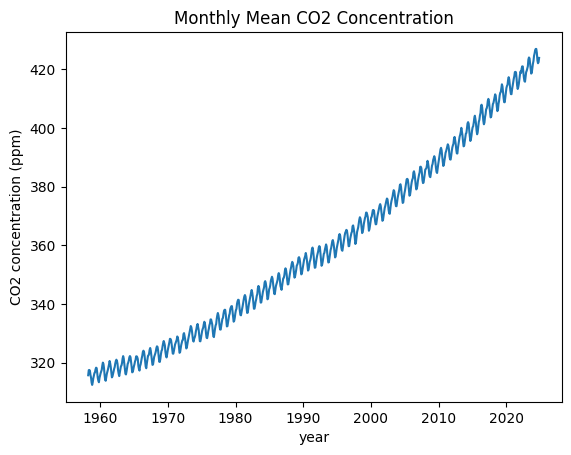

In [ ]:
# import matpllotlib.pyplot, and create a plot of 'decimal_year' vs. 'average' CO2.
import matplotlib.pyplot as plt

plt.plot(co2_data.decimal_year, co2_data.average)
plt.xlabel('year')
plt.ylabel('CO2 concentration (ppm)')
plt.title('Monthly Mean CO2 Concentration')
plt.show()


## Next Steps

You've now met the basics of importing and plotting a real-world environmental dataset! These are fundamental skills for using Python (or any programming language) in science, and you will practice them again and again throughout the course.

However, the example above only scratches the surface of the types of data that `pandas` can deal with. It's worth going through the ['10 minutes to pandas'](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) tutorial, as well as having a read through the `pandas` [Getting Started Tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) to get more of an idea of what it's capable of.

It's particularly useful to have an overview of the types of data that `pandas` can work with, and how to import them using the various `pd.read_*()` functions. For example, you'll certainly come across data in Microsoft Excel format, which can be imported using the `pd.read_excel()` function! You can find a complete list of all the data formats `pandas` can work with and how to import them [here](https://pandas.pydata.org/docs/user_guide/io.html#io).

### A Trickier Dataset...

The Mauna Loa CO2 dataset is a nice simple one that we chose because of how easy it is to import and work with... unfortunately, this isn't always the case, as you're about to see!

For the rest of the practical, you'll be working with a new dataset of rainfall, temperature and sunshine hours collected from a Met Office station the roof of the NIAB building in Cambridge.

You can find the NIAB dataset [here](https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/cambridgedata.txt), and see a complete list of Met Office weather stations and a description of the data [here](https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data).

Use the skills you have learned above to import this dataset into a new pandas dataframe stored in a variable called `niab_data`. Make sure you have appropriate column names.

 > **Hint**: You'll need to use two new arguments to import this data: `skiprows` and `skipfooter`. You can find out more about these in the [function documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), but briefly: these tell pandas to omit some lines at the start and end of the file that either don't contain data (the header), or contain additional columns that will prevent `pandas` importing the data properly (the last 9 lines of the file contain an extra column marking the data as 'provisional'). This is necessary because the `pandas` expects the same number of columns in each row of the dataset, but these 9 rows have an additional column.

In [ ]:
# import the NIAB dataset here

NIAB_data=pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/cambridgedata.txt",skiprows=7, skipfooter=11, sep='\s+', header=None)
NIAB_data.columns = ['year', 'month','max_temp','min_temp','air frost days','rain_mm','sun_hours']

NIAB_data.head()


<ipython-input-82-3e98a6296765>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  NIAB_data=pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/cambridgedata.txt",skiprows=7, skipfooter=11, sep='\s+', header=None)


,year,month,max_temp,min_temp,air frost days,rain_mm,sun_hours
0,1959,1,4.4,-1.4,20,---,78.1
1,1959,2,7.5,1.2,9,---,66.0
2,1959,3,11.5,3.8,0,---,98.0
3,1959,4,14.3,5.4,0,---,146.1
4,1959,5,18.1,6.5,0,---,224.8


Before you do anything, make sure your columns are labelled correctly, and that you understand what each column represents. You might like to take a look at the data description on the page [here](https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data).

#### Plotting the data!

Once you've worked out what all the columns are, make a plot of year vs. the total sunshine duration:

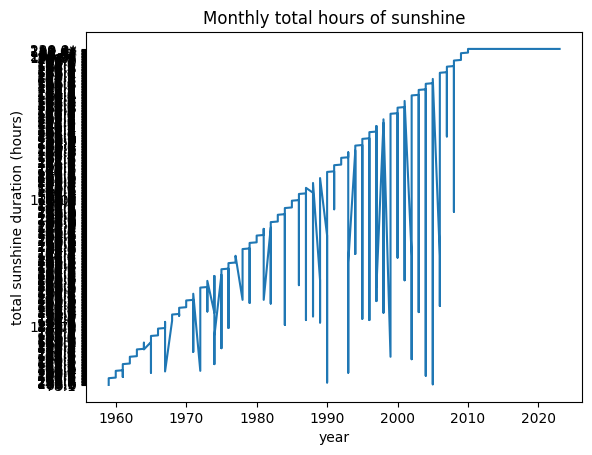

In [ ]:
# make a plot of year vs. sunshine hours
plt.plot(NIAB_data.year, NIAB_data.sun_hours)
plt.xlabel('year')
plt.ylabel('total sunshine duration (hours)')
plt.title('Monthly total hours of sunshine')
plt.show()

Unless you've had some remarkable stroke of luck, you've just produced a **very** strange-looking plot. The y-axis is a garbled mess, and the data shows a very strange pattern... the number of sunny days in Cambridge *definitley* hasn't increased every year since 1960. And what's going on with all those vertical lines?!

When you looked at the data above (or you should have...) it looked like a sensible data table... So what's going on? This is an example of a dataset that requires a bit of 'cleaning' before we can do anything useful with it.

### Data Cleaning

What we're looking at here is an example of data that have been stored in a way that `pandas` cannot easily understand. The data are all present in the `DataFrame` but, for some reason, `pandas` does not know how to work with them properly.

Specifically, `pandas` doesn't know what `type` of data are in the columns, so it doesn't treat it properly when you try and, for example, make a plot with it.

> **Note**: All data in python are `objects` which have a `type` to tell python how to treat it. For example the meaning of `+` changes depending on the `type` of the data. Text is stored as 'string' (`str`) objects, and python knows that `'abc' + 'def' = 'abcdef`. Numbers, on the other hand, can be either integers (`int`) or decimals (known as 'floating point' numbers; `float`), and python knows that `1.5 + 2.3 = 3.8`. If you try and add a string and a number, python will throw an error, because it doesn't know how to add them together.

The problem we've hit here is that `pandas` was not able to correctly determine the `type` of data in each column of the `DataFrame`.
We can see that this is the case by asking `pandas` what `type` of data is in each column by looking at the `dtypes` property. Do this by running `niab_data.dtypes` in the cell below. Numeric data (as we're expecting in this table) should all be of type floating-point (decimal, or `float`) or integer (`int`).

This is a *very* common problem when importing data, and the first thing you should check if things are behaving a bit strangely.

In [ ]:
# look at the data types of the columns in niab_data
NIAB_data.dtypes

,0
year,int64
month,int64
max_temp,object
min_temp,object
air frost days,object
rain_mm,object
sun_hours,object


You should see here that two of the columns are `int64` (64 bit integer values), while the rest are all of type `object`... i.e. something other than `numeric`. This is no good for potting or calculation, as `pandas` doesn't know how to deal with these different types of data... how do you plot a text (`str`) value on a graph?! To do anything with this dataset, we need to make sure it's all being correctly interpreted as numeric data.

Looking back at the [raw text](https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/cambridgedata.txt), we can identify three problems with this dataset that we need to fix:
1. A lot of the entries are not numbers: `---` is used to represent missing data, and `*` is prepended to numbers to indicate that the value has been estimated (e.g. the `sun hours` value in April 1967). These must be excluded before we can work with the data.
2. Because of these characters, `pandas` has not automatically recognised the columns of data as numbers. Once we've removed these rogue characters, we'll need to tell `pandas` to convert the columns to numeric data.
3. There is no easy `x` axis for plotting - in the last dataset we could use `decimal_year`, but here we only have `year` and `month`, so we'll need to create a more useful time variable for plotting.

> This probably seems like a lot, but this is exactly the type of issue you'll encounter with real world data (this *is* real world data!). There are no global standards with data, which means anyone that publishes a dataset can use their own, esoteric way of presenting that data. Unfortunately, this is something you'll have to get used to as an environmental data scientist!

#### 1. Removing Rogue Characters
We can use the `.replace()` method of the dataframe to get rid of the `---` and `[number]*` characters, and replace with `NaN` values. `NaN` values tell python that the data is missing, and should be ignored. In practice, we use the `np.nan` value, which is a special value from the `numpy` package that tells python that the data is missing.

For example:
```python
niab_data = niab_data.replace('\*', np.nan, regex=True)  # This replaces all entries that contain '[number]*' with 'NaN' values using a Regular Expression (regex)... don't worry about this for now. You could have found out how to do this by Googling!
```

 > **Hint:** notice how we're re-assigning the result of the `.replace()` method to the `niab_data` variable. This is because the `.replace()` method doesn't change the dataframe in place, but instead returns a new dataframe with the changes applied. This is a common pattern in Python, and is something you'll need to get used to.

Use the `.replace()` method to replace all the `---` and `*` characters in the dataframe with `NaN` values in the cell below.

In [ ]:
# use the `.replace()` method to remove rogue characters from niab_data
import numpy as np
NIAB_data=pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/cambridgedata.txt",skiprows=7, skipfooter=11, sep='\s+', header=None)
NIAB_data.columns = ['year', 'month','max_temp','min_temp','air frost days','rain(mm)','sun_hours']

NIAB_data.head()
NIAB_data = NIAB_data.replace('\*', np.nan, regex=True)
NIAB_data = NIAB_data.replace('\---', np.nan, regex=True)

NIAB_data.head()








<ipython-input-89-d36d6fea0622>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  NIAB_data=pd.read_csv("https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/cambridgedata.txt",skiprows=7, skipfooter=11, sep='\s+', header=None)


,year,month,max_temp,min_temp,air frost days,rain(mm),sun_hours
0,1959,1,4.4,-1.4,20,NaN,78.1
1,1959,2,7.5,1.2,9,NaN,66.0
2,1959,3,11.5,3.8,0,NaN,98.0
3,1959,4,14.3,5.4,0,NaN,146.1
4,1959,5,18.1,6.5,0,NaN,224.8


#### 2. Converting the data to numeric

Now we've cleaned up the data, we can make sure all the data is numeric.
We can do this using the `.astype(float)` method of the dataframe, which will attempt to convert the data in a column to decimal ('floating point') values. For example:

```python
niab_data = niab_data.astype(float)  # This converts the 'tmax' column to floating point numeric values
```

Run this in the cell below, followed by checking the `dtypes` attribute again to see if it has worked.

In [ ]:
# convert the niab_data to float data type
NIAB_data = NIAB_data.astype(float)
NIAB_data.dtypes

,0
year,float64
month,float64
max_temp,float64
min_temp,float64
air frost days,float64
rain(mm),float64
sun_hours,float64


#### 3. A useful time axis

Finally, use the cell below to create a new column called `decimal_year` that contains the decimal year for each row of the dataset. You can do this by adding the `year` and `month` columns together, and then dividing by 12.

In [ ]:
# calculate a new 'decimal_year' column for niab_data
NIAB_data['decimal_year'] = NIAB_data['year'] + NIAB_data['month']/12
NIAB_data.head()


,year,month,max_temp,min_temp,air frost days,rain(mm),sun_hours,decimal_year
0,1959.0,1.0,4.4,-1.4,20.0,NaN,78.1,1959.083333
1,1959.0,2.0,7.5,1.2,9.0,NaN,66.0,1959.166667
2,1959.0,3.0,11.5,3.8,0.0,NaN,98.0,1959.250000
3,1959.0,4.0,14.3,5.4,0.0,NaN,146.1,1959.333333
4,1959.0,5.0,18.1,6.5,0.0,NaN,224.8,1959.416667


### Plotting the Data

Now you've wrangled the data into a useful format, we can start doing something with it!

Try and draw the plot above again, but this time using `decimal_year` as the x-axis. You should see that the plot looks a lot more sensible now!

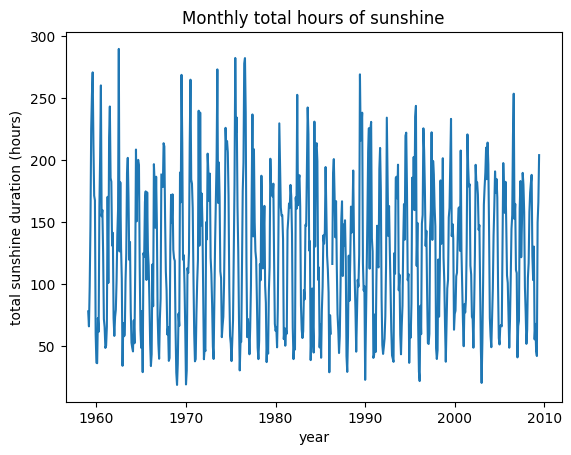

In [ ]:
# plot decimal_year vs. sunshine hours
plt.plot(NIAB_data.decimal_year, NIAB_data.sun_hours)
plt.xlabel('year')
plt.ylabel('total sunshine duration (hours)')
plt.title('Monthly total hours of sunshine')
plt.show()

That should look much better! A nice regular seasonal signal, with more sun in the summer and less in the winter... and no large upward trend!

In the cells below, create four different plots with `decimal_year` on the x-axis, showing:
1. maximum and minimum temperature on the same graph
2. rainfall
3. sunhine hours
4. frost days

As always... label your axes!

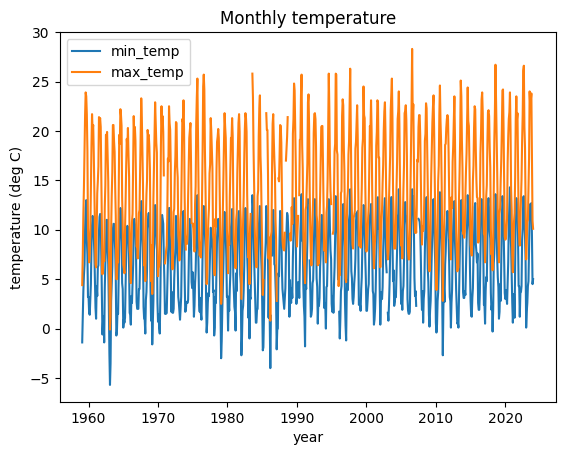

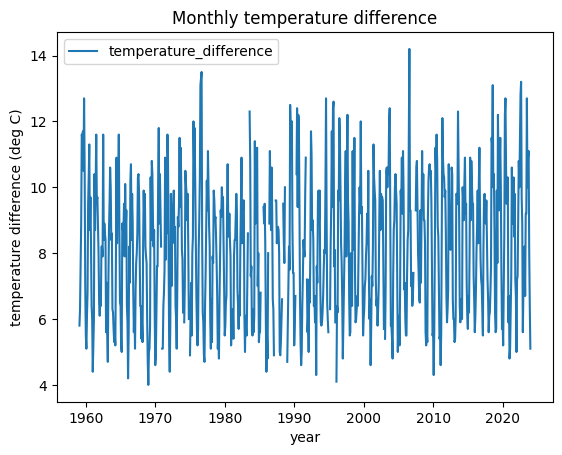

In [ ]:
# plot decimal_year vs. the minimum and maximum temperatures
plt.plot(NIAB_data.decimal_year, NIAB_data.min_temp, label='min_temp')
plt.plot(NIAB_data.decimal_year, NIAB_data.max_temp, label='max_temp')

plt.xlabel('year')
plt.ylabel('temperature (deg C)')
plt.legend()
plt.title('Monthly temperature')
plt.show()

NIAB_data['temp_difference'] = NIAB_data['max_temp'] - NIAB_data['min_temp']
plt.plot(NIAB_data.decimal_year, NIAB_data.temp_difference, label='temperature_difference')
plt.xlabel('year')
plt.ylabel('temperature difference (deg C)')
plt.legend()
plt.title('Monthly temperature difference')
plt.show()

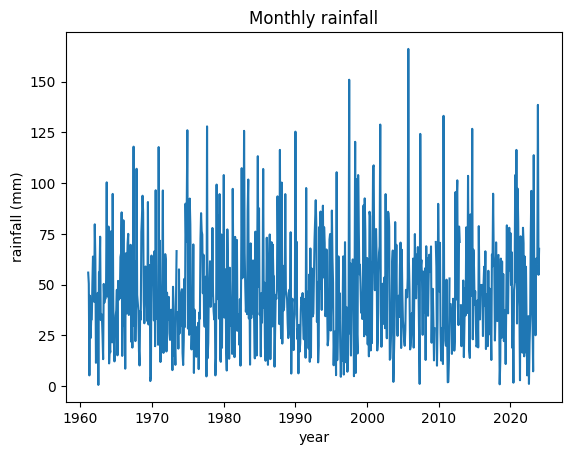

In [ ]:
# plot decimal_year vs. rainfall
plt.plot(NIAB_data.decimal_year, NIAB_data['rain(mm)'])
plt.xlabel('year')
plt.ylabel('rainfall (mm)')
plt.title('Monthly rainfall')
plt.show()


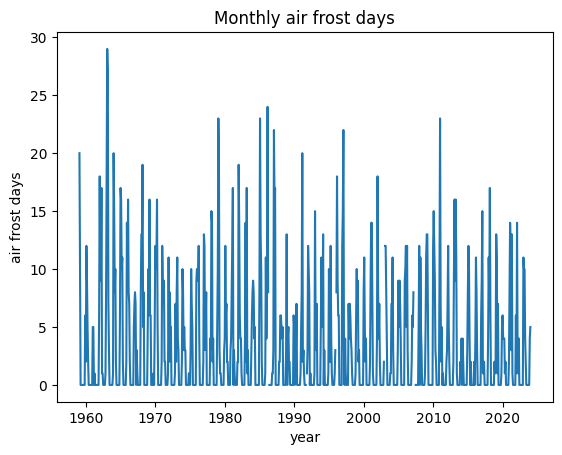

In [ ]:
# plot decimal_year vs. air frost days
plt.plot(NIAB_data.decimal_year, NIAB_data['air frost days'])
plt.xlabel('year')
plt.ylabel('air frost days')
plt.title('Monthly air frost days')
plt.show()


### More Advanced Plotting

So far we've made very basic plots with default settings. What if we want to do something more complex? For example, it would be nice to be able to directly compare the data in the four plots above directly, rather than having to flick between them. To do this, we might want to put them all on the same figure with a shared x-axis.

To do this, we need to understand a bit more about how `matplotlib` works.

### The Anatomy of a `Figure`

A `Figure` is like the piece of paper where you're about to draw your plot. It has a size and shape, and you can draw whatever you like on it.
You then add one or more `Axes` to the figure, which are the spaces where the data are 'drawn' to create the plots.

Each `Axes` then has a number of other properties that define how the figure looks, which are summarised by this nice figure from the `matplotlib` [Quick Start Guide](https://matplotlib.org/stable/users/explain/quick_start.html):

<img src="https://matplotlib.org/stable/_images/anatomy.png" style="width:50%">

There's a lot you can customise here... but for now, we'll by creating a `Figure` with four `Axes` objects to display each of the interesting columns in the `niab_data`.
Doing it this way opens up a wide range of customisations that aren't accessible via the basic `plt.plot` function that we've been using so far.
Do this using the `plt.subplots()` function, which returns a `Figure` and a list of `Axes` objects that you can then use to plot your data.

For example:
    
```python
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=[width, height])
```

will create a `Figure`, and populate it with four `Axes` object for you to draw your plots on. Notice you can also specify the size of the figure you're creating. You could also create multiple `Axes` within the figure by increasing the `nrows` and `ncols` arguments. Notice here that the function returns *two* values, which we are assigning to two separate names by having two variable names on the left of the `=` sign.

The `axs` variable contains a list of four `Axes` objects, each of which has multiple `methods` attached to it for making different types of plot. For example, you could create a scatter plot of the data in the first `Axes` using `axs[0].scatter(x, y)`, or a line plot on the last `Axes` using `axs[-1].plot(x, y)`. You can find a full list of the different types of plot you can make with `matplotlib` [here](https://matplotlib.org/stable/api/axes_api.html#plotting).

Add to the code in the cell below to create a `Figure` with four `Axes` objects, and then plot the data from the `niab_data` dataframe on them. You should also make the figures share the same x-axis, so that you can compare them directly, by specifying `sharex=True` in the `plt.subplots` call.

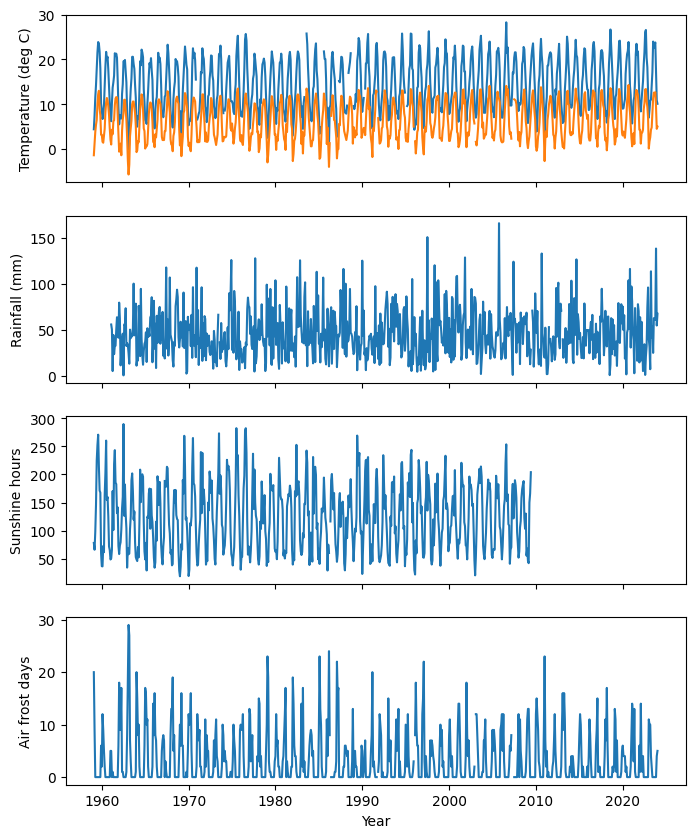

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

ax0, ax1, ax2, ax3 = axs  # this separates out each of the four axes into its own variable

ax0.plot(NIAB_data.decimal_year, NIAB_data.max_temp)  # NB you might need to change 'tmax' and 'tmin' here, if you have used different column names
ax0.plot(NIAB_data.decimal_year, NIAB_data.min_temp)
ax0.set_ylabel('Temperature (deg C)')

ax1.plot(NIAB_data.decimal_year, NIAB_data['rain(mm)'])
ax1.set_ylabel('Rainfall (mm)')

ax2.plot(NIAB_data.decimal_year, NIAB_data.sun_hours)
ax2.set_ylabel('Sunshine hours')

ax3.plot(NIAB_data.decimal_year, NIAB_data['air frost days'])
ax3.set_ylabel('Air frost days')

plt.xlabel('Year')
plt.show()



# make the rest of the plots for the other variables here

### Practical Check-In

For the practical check, upload the four-panel plot you created above.

The easiest way to save a high resolution figure from colab is to use the following code in the same cell as your plotting code:

``` python
from google.colab import files
plt.savefig("figure_name.png",dpi=300) #Set figure name and the dpi (dots per inch).
files.download("your_crsid.png")
```

The downloaded image should then be submitted on Moodle, named with your CRSID.